<h1>CS1656 - Term Project</h1>
<h2>Praneeth Sangani</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
from sklearn.cluster import DBSCAN

In [2]:
Q1 = pd.read_csv('HealthyRideRentals2019-Q1.csv')
Q2 = pd.read_csv('HealthyRideRentals2019-Q2.csv')
Q3 = pd.read_csv('HealthyRideRentals2019-Q3.csv')

frames = [Q1, Q2, Q3]
data = pd.concat(frames)
data["Starttime"] = data["Starttime"].str.split().str[0]
info = data[["Starttime", "From station id", "To station id"]]
info = info.rename(columns={'Starttime': 'Date', 'From station id': "fromCNT", 'To station id': 'toCNT'})
info["Station ID"] = info["fromCNT"]

FileNotFoundError: [Errno 2] File b'HealthyRideRentals2019-Q1.csv' does not exist: b'HealthyRideRentals2019-Q1.csv'

<h3>TASK 1</h3>

<h5>Task 1.1</h5>

In [3]:
daily = info.groupby(["Date","Station ID"]).agg (
    {'fromCNT': "count",
     'toCNT': "count"}
)
daily["rebalCNT"] = daily.apply(lambda row: row["fromCNT"] - row["toCNT"], axis = 1)
daily[:20]

fromCNT  toCNT  rebalCNT
Date   Station ID                          
1/1/19 1000.0            4      4         0
       1002.0            1      1         0
       1009.0            1      1         0
       1010.0            1      1         0
       1012.0            4      4         0
       1021.0            2      2         0
       1023.0            1      1         0
       1024.0            2      2         0
       1028.0            1      1         0
       1029.0            2      2         0
       1031.0            2      2         0
       1033.0            4      4         0
       1045.0            2      2         0
       1048.0            1      1         0
       1049.0            3      3         0
       1061.0            1      1         0
       1069.0            1      1         0
       1094.0            1      1         0
       1099.0            2      2         0
       49441.0           1      1         0

<h5>Task 1.2</h5>

In [4]:
monthly = info.copy()
monthly["month"] = monthly["Date"].str.split("/").str[0]
monthly["year"] = monthly["Date"].str.split("/").str[2]
monthly["Date"] = monthly.apply(lambda row: row["month"] + "/" + row["year"], axis = 1)
monthly = monthly.groupby(["Date", "Station ID"]).agg (
    {'fromCNT': "count",
     'toCNT': "count"}
)
monthly["rebalCNT"] = monthly.apply(lambda row: row["fromCNT"] - row["toCNT"], axis = 1)
monthly[:20]

fromCNT  toCNT  rebalCNT
Date Station ID                          
1/19 1000.0           35     35         0
     1001.0           59     59         0
     1002.0           36     36         0
     1003.0           11     11         0
     1004.0           32     32         0
     1005.0           17     17         0
     1006.0           39     39         0
     1007.0            6      6         0
     1008.0            5      5         0
     1009.0           42     42         0
     1010.0           44     44         0
     1011.0           25     25         0
     1012.0           16     16         0
     1013.0           35     35         0
     1014.0            2      2         0
     1015.0           41     41         0
     1016.0           50     50         0
     1017.0           28     28         0
     1018.0            4      4         0
     1019.0           24     24         0

<h3>Task 2</h3>

In [5]:
# User Input
filter_month = 4
filter_stationID = 1046

<h5>Task 2.1</h5>

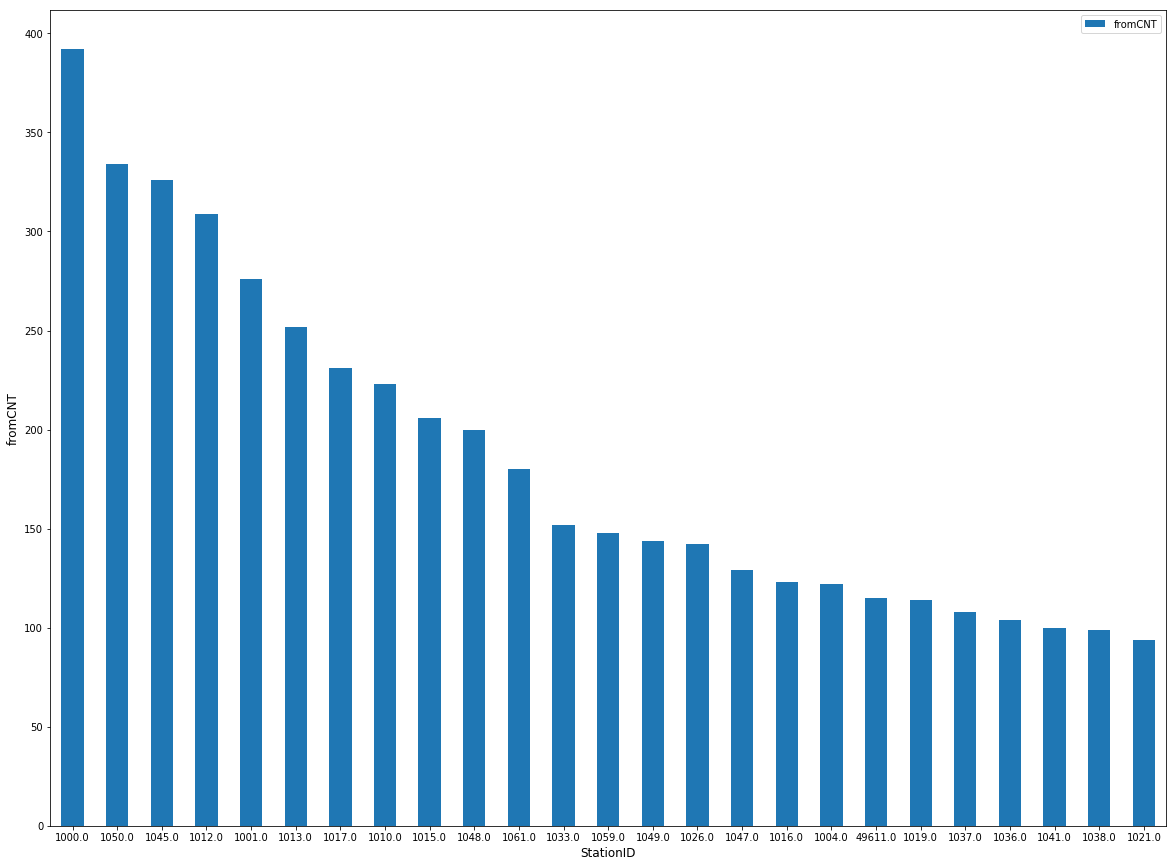

In [6]:
popular = info.copy()
popular["Date"] = popular["Date"].str.split("/").str[0]
popular = popular.groupby(["Date", "Station ID"], as_index=False).agg (
    {'fromCNT': "count"}
)
popular = popular[popular.Date == str(filter_month)]
popular = popular.sort_values(['fromCNT'], ascending=[False])
popular = popular[:25]
ax = popular.plot.bar(x='Station ID', y='fromCNT', rot=0, figsize=(20, 15))
ax.set_xlabel("StationID", fontsize=12)
ax.set_ylabel("fromCNT", fontsize=12)
plt.show()

<h5>Task 2.2</h5>

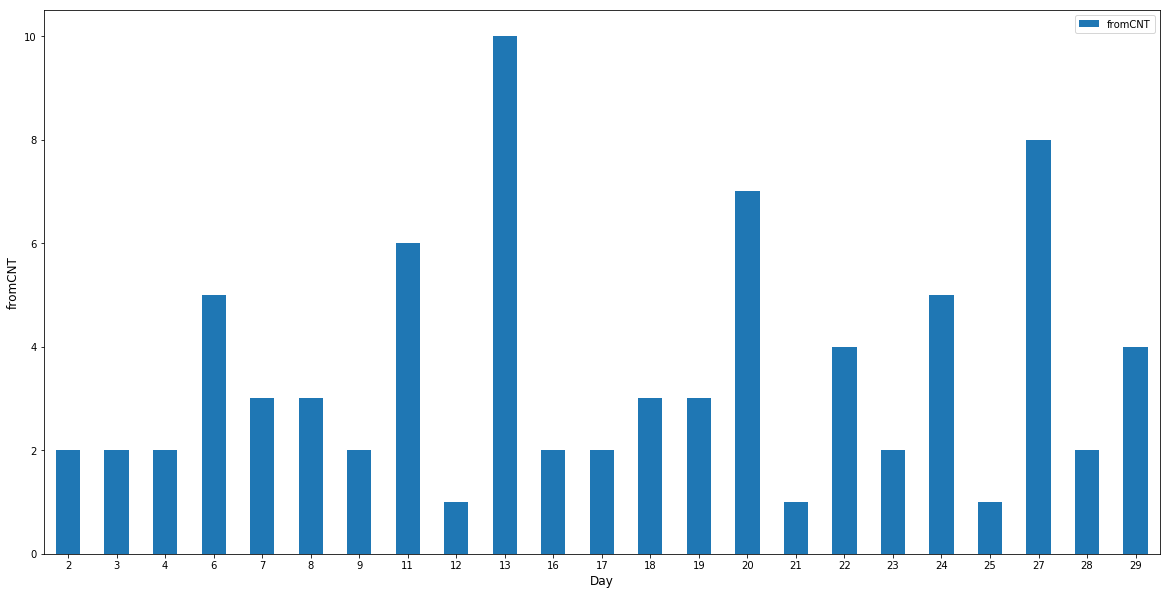

In [7]:
distribution = info.copy()
distribution = distribution.groupby(["Date", "Station ID"], as_index=False).agg (
    {'fromCNT': "count"}
)
distribution["Month"] = distribution["Date"].str.split("/").str[0]
distribution["Day"] = distribution["Date"].str.split("/").str[1]
distribution = distribution[distribution.Month == str(filter_month)]
distribution = distribution[distribution["Station ID"] == filter_stationID]
distribution["Day"] = distribution["Day"].astype(int)
distribution = distribution.sort_values(['Day'], ascending=[True])
ax = distribution.plot.bar(x='Day', y='fromCNT', rot=0, figsize=(20, 10))
ax.set_xlabel("Day", fontsize=12)
ax.set_ylabel("fromCNT", fontsize=12)
plt.show()

<h5>Task 2.3</h5>

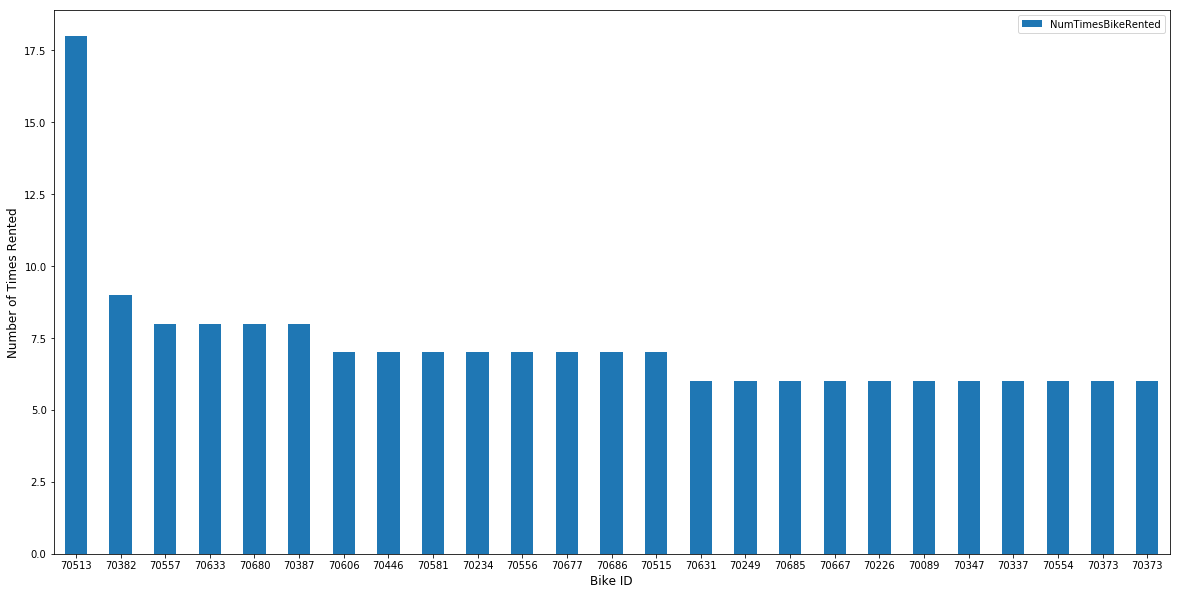

In [8]:
data["NumTimesBikeRented"] = data["Bikeid"]
day = data.groupby(["Starttime", "Bikeid"], as_index=False).agg (
    {'NumTimesBikeRented': "count"}
)
day = day.rename(columns={'Starttime': 'Date'})
day["Month"] = day["Date"].str.split("/").str[0]
day = day[day.Month == str(filter_month)]
day = day.sort_values(['NumTimesBikeRented'], ascending=[False])
day = day[:25]
ax = day.plot.bar(x='Bikeid', y='NumTimesBikeRented', rot=0, figsize=(20, 10))
ax.set_xlabel("Bike ID", fontsize=12)
ax.set_ylabel("Number of Times Rented", fontsize=12)
plt.show()

<h3>Task 3</h3>

<h5>Task 3.1</h5>

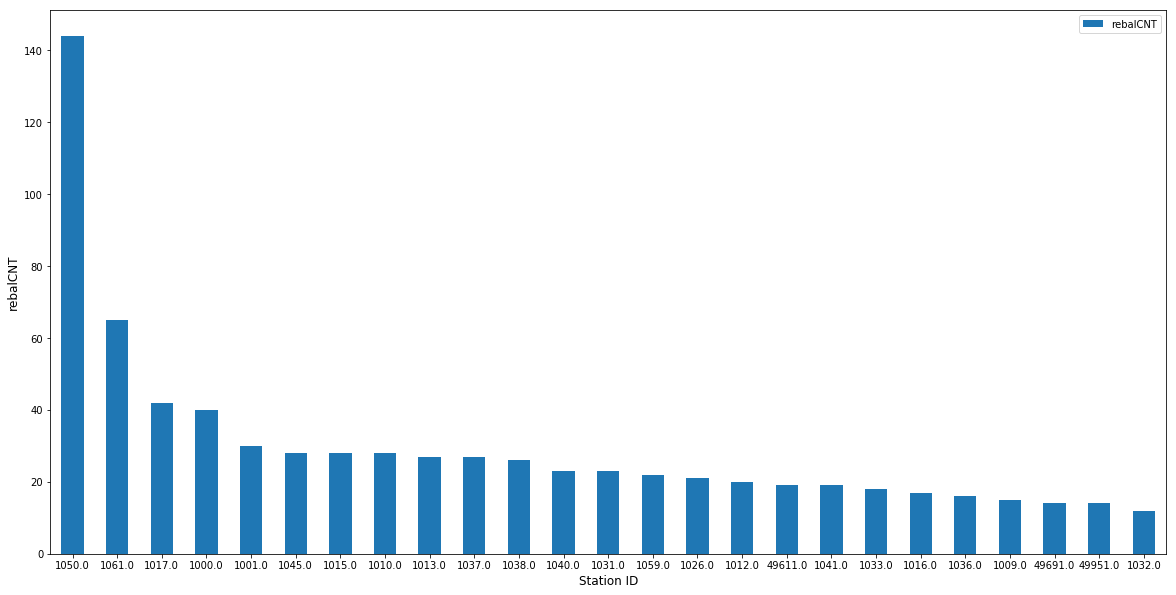

In [9]:
rebal = info.copy()
rebal["Month"] = rebal["Date"].str.split("/").str[0]
rebal = rebal.groupby(["Station ID","Month"], as_index=False).agg (
    {'fromCNT': "count",
     'toCNT': "count"}
)
rebal["rebalCNT"] = rebal.apply(lambda row: row["fromCNT"] - row["toCNT"], axis = 1)
rebal = rebal[rebal.Month == str(filter_month)]
rebal = rebal.sort_values(['rebalCNT'], ascending=[False])
rebal = rebal[:25]
ax = rebal.plot.bar(x='Station ID', y='rebalCNT', rot=0, figsize=(20, 10))
ax.set_xlabel("Station ID", fontsize=12)
ax.set_ylabel("rebalCNT", fontsize=12)
plt.show()

<h5>Task 3.2</h5>

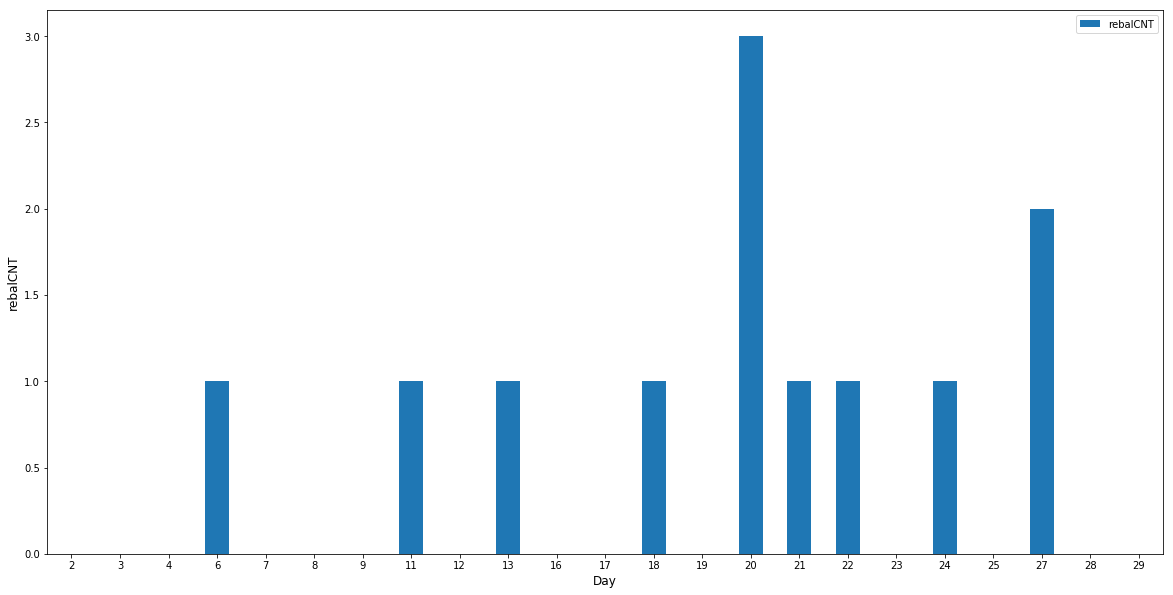

In [10]:
rebal = info.copy()
rebal["Month"] = rebal["Date"].str.split("/").str[0]
rebal["Day"] = rebal["Date"].str.split("/").str[1]
rebal = rebal.groupby(["Station ID","Month", "Day"], as_index=False).agg (
    {'fromCNT': "count",
     'toCNT': "count"}
)
rebal["rebalCNT"] = rebal.apply(lambda row: row["fromCNT"] - row["toCNT"], axis = 1)
rebal = rebal[rebal.Month == str(filter_month)]
rebal = rebal[rebal["Station ID"] == filter_stationID]
rebal = rebal.sort_values(['rebalCNT'], ascending=[False])
rebal["Day"] = rebal["Day"].astype(int)
rebal = rebal.sort_values(['Day'], ascending=[True])
rebal = rebal[:25]
ax = rebal.plot.bar(x='Day', y='rebalCNT', rot=0, figsize=(20, 10))
ax.set_xlabel("Day", fontsize=12)
ax.set_ylabel("rebalCNT", fontsize=12)
plt.show()

<h3>Task 4</h3>

In [11]:
clust = info.copy()
clust["Month"] = clust["Date"].str.split("/").str[0]
f = {'fromCNT': "count", 'toCNT': "count"}
clust = clust.groupby(["Station ID", "Month"], as_index=False).agg(f)
clust["rebalCNT"] = clust.apply(lambda row: row["fromCNT"] - row["toCNT"], axis = 1)
clust = clust[(clust.Month == '7') | (clust.Month == '8') | (clust.Month == '9')]
clust = clust.groupby(["Station ID", "Month"], as_index=False).agg(
{'fromCNT': "sum", 'rebalCNT':"sum"}
)
# Task 4.1
k_means = cluster.KMeans(n_clusters=3, init = 'k-means++',random_state=5000)
k_means.fit(clust)
k_means4 = cluster.KMeans(n_clusters=4, init = 'k-means++',random_state=5000)
k_means4.fit(clust)
k_means5 = cluster.KMeans(n_clusters=5, init = 'k-means++',random_state=5000)
k_means5.fit(clust)

db32 = DBSCAN(eps=3, min_samples=2).fit(clust)
db23 = DBSCAN(eps=2, min_samples=3).fit(clust)
db43 = DBSCAN(eps=4, min_samples=3).fit(clust)

<function matplotlib.pyplot.show(*args, **kw)>

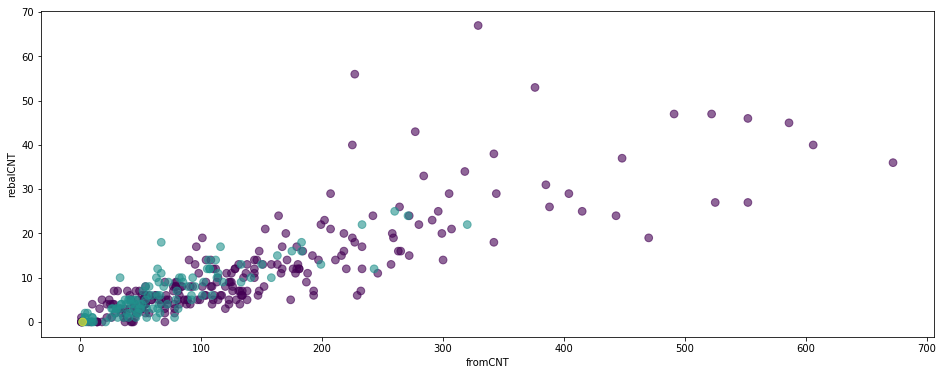

In [12]:
#Task 4.2 - I was not sure how to do the bar graphs, so rather than doing nothing I made these graphs
fig = plt.figure(figsize=(16,6))
plt.scatter(clust['fromCNT'],clust['rebalCNT'],60,c=k_means.labels_, alpha = 0.6)
plt.xlabel('fromCNT')
plt.ylabel('rebalCNT')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

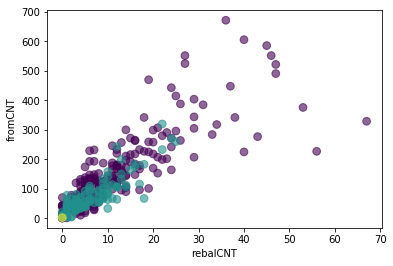

In [13]:
plt.scatter(clust['rebalCNT'],clust['fromCNT'],60,c=k_means.labels_, alpha = 0.6)
plt.xlabel('rebalCNT')
plt.ylabel('fromCNT')
plt.show

<h5>Task 4.3</h5>
<p>I chose the numbers that were fairly close to one another to see what kind of deviations you would notice from chaning it slightly.
I was not sure how to graph them so I do not know what the best value of K and which algorithm will be better.
If I had graphs however I would compare the performance between kmeans and DBSCAN(which ever one was closer to 1).</p>